In [11]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from random import shuffle
import os

Train_dir = "../input/train/"
Test_dir = "../input/test/"

img_size = 50
LR = 1e-3

In [12]:
# label the images
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':
        return [1,0]
    elif word_label == 'dog':
        return [0,1]

In [13]:
# process training images
def create_training_data():
    training_data = []
    for img in tqdm(os.listdir(Train_dir)):
        label = label_img(img)
        path = os.path.join(Train_dir,img)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    return training_data

In [14]:
# process test data, note that this is unlabelled data
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(Test_dir)):
        path = os.path.join(Test_dir, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        testing_data.append([np.array(img), img_num])    
    shuffle(testing_data)
    return testing_data

In [15]:
# create array from test images
train_data = create_training_data()
test_data = process_test_data()

100%|██████████| 12500/12500 [00:22<00:00, 552.94it/s]


In [18]:
# use tflearn to define our neural network

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [19]:
convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [20]:
# we look for previously saved model so as to save training time

if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print('model loaded!')

In [21]:
# split our training data into train and test data inorder to check accuracy`
train = train_data[:-500]
test = train_data[-500:]

# create data arrays
train_X = np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
train_y = [i[1] for i in train]

test_X = np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
test_y = [i[1] for i in test]

In [22]:
# fit the model with 3 epochs

model.fit({'input': train_X}, {'targets': train_y}, n_epoch=3, validation_set=({'input': test_X}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 1148  | total loss: 11.24643 | time: 43.691s
| Adam | epoch: 003 | loss: 11.24643 - acc: 0.5116 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.23710 | time: 44.805s
| Adam | epoch: 003 | loss: 11.23710 - acc: 0.5120 | val_loss: 11.19056 - val_acc: 0.5140 -- iter: 24500/24500
--


In [23]:
# we need to reset the graph instance, since we're doing this in a continuous environment:

import tensorflow as tf
tf.reset_default_graph()

In [24]:
convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print('model loaded!')

model.fit({'input': train_X}, {'targets': train_y}, n_epoch=3, validation_set=({'input': test_X}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 1148  | total loss: 0.45678 | time: 48.045s
| Adam | epoch: 003 | loss: 0.45678 - acc: 0.7857 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.44519 | time: 49.180s
| Adam | epoch: 003 | loss: 0.44519 - acc: 0.7946 | val_loss: 0.58745 - val_acc: 0.6980 -- iter: 24500/24500
--


In [25]:
# Visualize the unlabelled test data

import matplotlib.pyplot as plt
%matplotlib inline

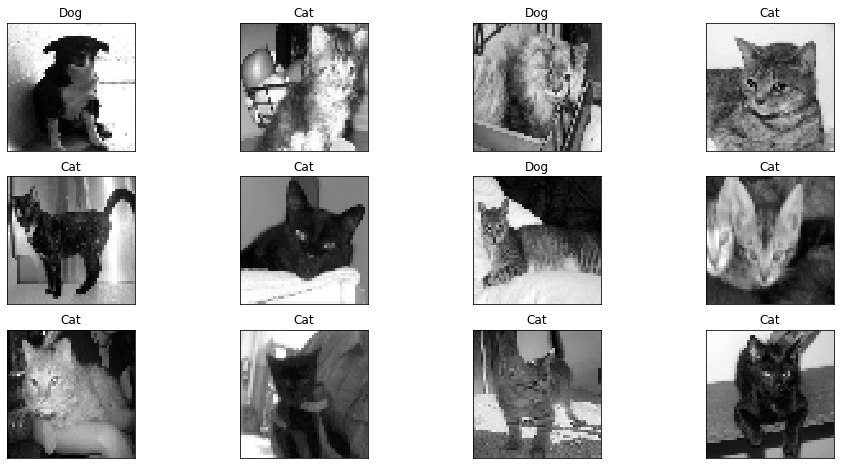

In [26]:
fig=plt.figure(figsize=(16,8))

for num,data in enumerate(test_data[:12]): #plot first 12 images
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()